# Patrones de Diseño Comunes en Python
Este notebook acompaña las diapositivas del tema. Contiene explicaciones, ejemplos resueltos y ejercicios propuestos basados en el capítulo 11 del libro de Steven F. Lott.

## 1. Decorator Pattern
Permite añadir funcionalidades a objetos sin modificar su estructura. Muy útil para extender comportamientos.

In [1]:
# Ejemplo de Decorator
class Notificador:
    def enviar(self, mensaje):
        print(f"Notificando: {mensaje}")

# Decorador
class NotificadorConLog:
    def __init__(self, notificador):
        self.notificador = notificador

    def enviar(self, mensaje):
        print("[LOG] Enviando mensaje")
        self.notificador.enviar(mensaje)

noti = NotificadorConLog(Notificador())
noti.enviar("¡Hola!")

[LOG] Enviando mensaje
Notificando: ¡Hola!


**Ejercicio Propuesto:** Implementa un decorador para una clase `Calculadora` que imprima cuándo se ejecuta una operación.

In [2]:
class Calculadora:
    def sumar(self, a, b):
        return a + b
    def restar(self, a, b):
        return a - b
    def multiplicar(self, a, b):
        return a * b
    def dividir(self, a, b):
        if b == 0:
            raise ValueError("No se puede dividir entre cero")
        return a / b
    


In [3]:
HP=Calculadora()
print(HP.sumar(2,3))
print(HP.restar(5,2))
print(HP.multiplicar(3,4))  
print(HP.dividir(10,2))

5
3
12
5.0


In [4]:
class CalculadoraAvanzada(Calculadora):
    def potencia(self, base, exponente):
        return base ** exponente
    def raiz_cuadrada(self, numero):
        if numero < 0:
            raise ValueError("No se puede calcular la raíz cuadrada de un número negativo")
        return numero ** 0.5
    
    

In [5]:
HP_pro=CalculadoraAvanzada()
print(HP_pro.potencia(2, 3))  # 8

print(HP_pro.raiz_cuadrada(16))  # 4.0  

8
4.0


## 2. Observer Pattern
Define una dependencia entre objetos, de modo que cuando uno cambia, los demás son notificados.

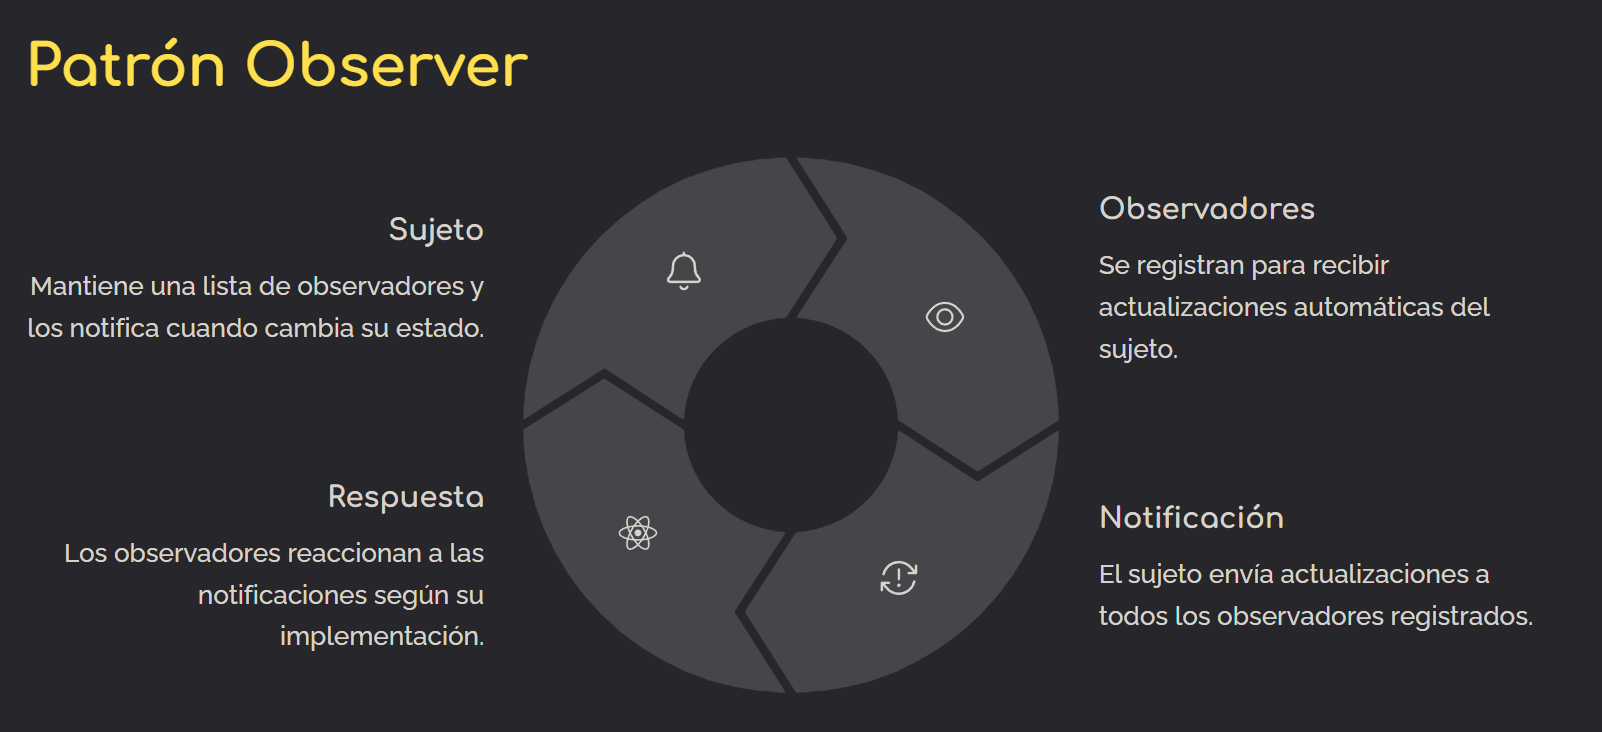

In [6]:
# Ejemplo simple de Observer
class Sujeto:
    def __init__(self):
        self._observadores = []

    def agregar(self, obs):
        self._observadores.append(obs)

    def notificar(self, valor):
        for obs in self._observadores:
            obs.actualizar(valor)

class Observador:
    def actualizar(self, valor):
        print(f"Recibido: {valor}")



In [7]:
s = Sujeto()
o1=Observador()
o2=Observador()
s.agregar(o1)
s.notificar("Nuevo estado")

Recibido: Nuevo estado


In [8]:
s.agregar(o2)
s.notificar("Otro estado")

Recibido: Otro estado
Recibido: Otro estado


**Ejercicio Propuesto:** Crea una clase `SensorTemperatura` que notifique a múltiples pantallas de visualización.

## 3. Strategy Pattern
Permite definir una familia de algoritmos, encapsularlos e intercambiarlos dinámicamente.

In [9]:
# Estrategias de descuento
class DescuentoFijo:
    def aplicar(self, total):
        return total - 5

class DescuentoPorcentaje:
    def __init__(self,porcentaje):
        self.porcentaje = porcentaje
        
    def aplicar(self, total):
        return total - (total *  self.porcentaje )/100

class Carrito:
    def __init__(self, estrategia):
        self.estrategia = estrategia

    def total_con_descuento(self, total):
        return self.estrategia.aplicar(total)



In [10]:
carro = Carrito(DescuentoPorcentaje(10))

print(carro.total_con_descuento(100))

90.0


In [11]:
carro= Carrito(DescuentoPorcentaje(20))

print(carro.total_con_descuento(200))

160.0


**Ejercicio Propuesto:** Implementa una clase `Juego` que permita cambiar dinámicamente su nivel de dificultad (fácil, medio, difícil).

## 4. Command Pattern
Encapsula una solicitud como un objeto, permitiendo parametrizar acciones.

In [12]:
# Ejemplo básico Command
class Luz:
    
    bool_on= False

    def encender(self):
        self.bool_on=True
        print("Luz encendida")

    def apagar(self):
        self.bool_on=False
        print("Luz apagada")


class ControlLuz:
    def __init__(self, luz):
        self.luz = luz

    def ejecutar(self):
        if  not self.luz.bool_on:
         self.luz.encender()
         self.luz.bool_on=True
        else:
         self.luz.apagar()




In [13]:

interruptor = ControlLuz(Luz())

interruptor.ejecutar()


Luz encendida


In [14]:
interruptor.ejecutar()


Luz apagada


In [15]:
L1=Luz()

L2=Luz()

in_1=ControlLuz(L1)

in_2=ControlLuz(L2)





In [16]:
in_1.ejecutar()

Luz encendida


In [17]:
in_1.ejecutar()

Luz apagada


**Ejercicio Propuesto:** Diseña un control remoto con múltiples comandos: TV, luces y puerta.

In [18]:
class ControlRemoto:

    bool_on_TV = False
    bool_on_L = False
    bool_on_Door = False

    def TV():

        if not ControlRemoto.bool_on_TV:
            ControlRemoto.bool_on_TV = True
            print("Encendiendo TV")
        else:
            ControlRemoto.bool_on_TV = False
            print("Apagando TV")

    def Luz():

        if not ControlRemoto.bool_on_L:
            ControlRemoto.bool_on_L = True
            print("Encendiendo Luz")
        else:
            ControlRemoto.bool_on_L = False
            print("Apagando Luz")
    def Door():
        if not ControlRemoto.bool_on_Door:
            ControlRemoto.bool_on_Door = True
            print("Abriendo puerta")
        else:
            ControlRemoto.bool_on_Door = False
            print("Cerrando puerta")
            

class PulseControl:
    def __init__(self, control):
        self.control = control

    def ejecutar(self):
        self.control()

In [19]:
P1=PulseControl(ControlRemoto.TV)

P1.ejecutar()


Encendiendo TV


In [20]:
P2=PulseControl(ControlRemoto.Luz)
P2.ejecutar()

Encendiendo Luz


In [21]:
P3=PulseControl(ControlRemoto.Door)
P3.ejecutar()

Abriendo puerta


## 5. State Pattern
Permite a un objeto alterar su comportamiento cuando su estado interno cambia.

In [22]:
# Ejemplo de Estado
class Estado:
    def manejar(self):
        pass


class EstadoInicio(Estado):
    def manejar(self):
        print("Estado: Inicio")


class EstadoFinal(Estado):
    def manejar(self):
        print("Estado: Final")


class Contexto:
    def __init__(self, estado):
        self.estado = estado

    def ejecutar(self):
        self.estado.manejar()


ctx = Contexto(EstadoInicio())
ctx.ejecutar()
ctx.estado = EstadoFinal()
ctx.ejecutar()

Estado: Inicio
Estado: Final


**Ejercicio Propuesto:** Implementa una máquina de estados para el ciclo de vida de una orden (recibida, procesando, enviada, entregada).

In [23]:
class Orden:
    def ordenar(self):
        pass

class OrdenRecibida(Orden):
    def ordenar(self):
        print("Orden recibida")
        
class OrdenEnProceso(Orden):
    def ordenar(self):
        print("Orden en proceso")

class OrdenEnviada(Orden):
    def ordenar(self):
        print("Orden enviada")

class OrdenEntregada(Orden):
    def ordenar(self):
        print("Orden entregada")
        

class ContextoOrden:
    def __init__(self, orden):
        self.orden = orden

    def ejecutar(self):
        self.orden.ordenar()


In [24]:
ctx_orden = ContextoOrden(OrdenRecibida())
ctx_orden.ejecutar()

ctx_orden.orden = OrdenEnProceso()
ctx_orden.ejecutar()

Orden recibida
Orden en proceso


## 6. Singleton Pattern
Asegura que una clase tenga solo una instancia.

In [25]:
# Singleton con clase base
class Singleton:
    _instancia = None

    def __new__(cls):
        if cls._instancia is None:
            cls._instancia = super().__new__(cls)
        return cls._instancia

class Logger(Singleton):
    def log(self, msg):
        print(f"[LOG]: {msg}")


In [26]:

log1 = Logger()
log2 = Logger()
print(log1 is log2)  # True

log1.log("Mensaje 1")
log2.log("Mensaje 2")  # Ambos son la misma instancia


print(log1==log2)


True
[LOG]: Mensaje 1
[LOG]: Mensaje 2
True


**Ejercicio Propuesto:** Implementa una clase `ConfiguracionGlobal` que siempre retorne la misma instancia con métodos para guardar/leer valores.

In [27]:
class Singleton:
    _instancia = None

    def __new__(cls):
        if cls._instancia is None:
            cls._instancia = super().__new__(cls)
        return cls._instancia
    
class Congfiguracion_Global(Singleton):
    def guardar(self, valor):
        print(f"Configuración guardada: {valor}")

        

In [30]:
C1=Congfiguracion_Global()
C2=Congfiguracion_Global()  

C2.guardar("Configuración 2")

C1.guardar("Configuración 1")  # Ambos son la misma instancia


print(C1==C2)  # True

Configuración guardada: Configuración 2
Configuración guardada: Configuración 1
True


## Conclusión
Los patrones de diseño permiten escribir código más limpio, reutilizable y adaptable. En Python se pueden implementar de manera sencilla usando clases y composición.